# After JUNE 9 Discussion

In [1]:
import pandas as pd
import numpy as np


from io import StringIO
import requests
import matplotlib.pyplot as plt
from datetime import datetime

import warnings
warnings.simplefilter('ignore')


from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.


### instance_commname

- us-east-1	  US East (N. Virginia)
- us-east-2   US East (Ohio)
- us-west-1	  US West (N. California)
- us-west-2	  US West (Oregon)

- Region Code	Region Name	Availability Zones
- us-east-1	N. Virginia	us-east-1a us-east-1b us-east-1c us-east-1d us-east-1e us-east-1f
- us-east-2	Ohio	us-east-2a us-east-2b us-east-2c
- 1us-west-1	N. California	us-west-1a us-west-1b us-west-1c
- us-west-2	Oregon	us-west-2a us-west-2b us-west-2c us-west-2d

In [ ]:
# path_feat = r'Capstone/Data_feat'
# uswest_ore_west2 = pd.read_csv(path_feat + '/Amazon EC2 Instance Comparison_WEST_OREGAN.csv', low_memory=False)
# uswest_cal_west1 = pd.read_csv(path_feat + '/Amazon EC2 Instance Comparison_WEST_NCALI.csv', low_memory=False)
# useast_ohi_east2 = pd.read_csv(path_feat + '/Amazon EC2 Instance Comparison_EAST_OHIO.csv', low_memory=False)
# useast_vir_east1 = pd.read_csv(path_feat + '/Amazon EC2 Instance Comparison_EAST_NVIRGINIA.csv', low_memory=False)

# uswest_ore_west2['AvailabilityZone'] = 'us-west-2'
# uswest_cal_west1['AvailabilityZone'] = 'us-west-1'
# useast_ohi_east2['AvailabilityZone'] = 'us-east-2'
# useast_vir_east1['AvailabilityZone'] = 'us-east-1'

# print(uswest_ore_west2.shape)
# print(uswest_cal_west1.shape)
# print(useast_ohi_east2.shape)
# print(useast_vir_east1.shape)

In [ ]:
# instances_info_all = pd.concat([uswest_ore_west2,uswest_cal_west1,useast_ohi_east2,useast_vir_east1])
# print(instances_info_all['API Name'].nunique())
# print(instances_info_all.shape)
# instances_info = instances_info_all[['AvailabilityZone','API Name', 'Memory', 'vCPUs', 'GPUs',
#                                      'Linux On Demand cost', 'Linux Reserved cost',  'Windows On Demand cost', 
#                                      'Windows Reserved cost']]

In [ ]:
# instances_info['Memory'] = instances_info['Memory'].str.replace('GiB', '').str.strip()
# instances_info['vCPUs'] = instances_info['vCPUs'].str[:3].str.replace('v','').str.strip()
# instances_info['Linux On Demand cost'] = instances_info['Linux On Demand cost'].str.replace('hourly','').str.strip()
# instances_info['Linux On Demand cost'] = instances_info['Linux On Demand cost'].str.replace('$','').str.strip()
# instances_info['Linux Reserved cost'] = instances_info['Linux Reserved cost'].str.replace('hourly','').str.strip()
# instances_info['Linux Reserved cost'] = instances_info['Linux Reserved cost'].str.replace('$','').str.strip()
# instances_info['Windows On Demand cost'] = instances_info['Windows On Demand cost'].str.replace('hourly','').str.strip()
# instances_info['Windows On Demand cost'] = instances_info['Windows On Demand cost'].str.replace('$','').str.strip()
# instances_info['Windows Reserved cost'] = instances_info['Windows Reserved cost'].str.replace('hourly','').str.strip()
# instances_info['Windows Reserved cost'] = instances_info['Windows Reserved cost'].str.replace('$','').str.strip()
# instances_info = instances_info.replace('unavailable',np.nan)

# ren_columns =['Zone','InstanceType', 'Memory', 'vCPUs', 'GPUs','linux_ondemand', 'linux_reserved', 'windows_ondemand','windows_reserved']
# instances_info.columns= ren_columns
# instances_info.head()

# DATA

In [ ]:
# unzip_path = r'/Users/Yejur/Documents/GitHub/Capstone/AWS_Spot_Prices' 
# east_1 = pd.read_csv(unzip_path + '/us-east-1.csv', error_bad_lines=False,low_memory=False)
# east_2 = pd.read_csv(unzip_path + '/us-east-2.csv',error_bad_lines=False,low_memory=False)
# west_1 = pd.read_csv(unzip_path + '/us-west-1.csv', error_bad_lines=False,low_memory=False)
# west_2 = pd.read_csv(unzip_path + '/us-west-2.csv', error_bad_lines=False,low_memory=False)

# west_2['Zone'] = 'us-west-2'
# west_1['Zone'] = 'us-west-1'
# east_2['Zone'] = 'us-east-2'
# east_1['Zone'] = 'us-east-1'

# main_data = pd.concat([east_1,east_2,west_1,west_2])

# Combining and merging info with main data

In [ ]:
# main_data_1 = main_data.pivot_table(index= ['Timestamp','AvailabilityZone','InstanceType','Zone'],
#                                     columns=['ProductDescription'],  values=['Price']).reset_index()
# main_data_2 = main_data_1.merge(instances_info, how='left', on=['InstanceType','Zone'])
# columns_proper = [ 'InstanceType','Zone','Timestamp','AvailabilityZone','InstanceType_1', 'Zone_1','Price_Linux/UNIX', 'Price_SUSE Linux',
#                   'Price_Windows', 'Memory','vCPUs', 'GPUs','Cost_linux_ondemand','Cost_linux_reserved','Cost_windows_ondemand',
#                   'Cost_windows_reserved']

# main_data_2.columns = columns_proper
# main_data_2.head()

In [ ]:
# linux_full_dataset = main_data_2[['InstanceType','Zone','Timestamp','AvailabilityZone','Price_Linux/UNIX',
#                                   'Memory','vCPUs', 'GPUs','Cost_linux_ondemand','Cost_linux_reserved']]

# windows_full_dataset = main_data_2[['InstanceType','Zone','Timestamp','AvailabilityZone','Price_Windows',
#                                   'Memory','vCPUs', 'GPUs','Cost_windows_ondemand','Cost_windows_reserved']]

In [ ]:
# windows_full_dataset.info()

In [ ]:
# linux_full_dataset.info()

In [ ]:
# linux_full_dataset[['Cost_linux_ondemand','Cost_linux_reserved']]=linux_full_dataset[['Cost_linux_ondemand','Cost_linux_reserved']].astype(np.float)
# windows_full_dataset[['Cost_windows_ondemand','Cost_windows_reserved']]=windows_full_dataset[['Cost_windows_ondemand','Cost_windows_reserved']].astype(np.float)

# linux_full_dataset['Timestamp'] = linux_full_dataset['Timestamp'].astype(np.datetime64)
# windows_full_dataset['Timestamp'] = windows_full_dataset['Timestamp'].astype(np.datetime64)

# CHECKPOINT

In [ ]:
# CHECKPOINT
# writing file for checkpointing
# linux_full_dataset.to_csv('linux_data_clean.csv', index=False)
# windows_full_dataset.to_csv('windows_data_clean.csv', index=False)

In [2]:
linux_full_dataset = pd.read_csv('linux_data_clean.csv', low_memory=False)
windows_full_dataset = pd.read_csv('windows_data_clean.csv', low_memory=False)

In [3]:
windows_full_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363326 entries, 0 to 363325
Data columns (total 10 columns):
InstanceType             363326 non-null object
Zone                     363326 non-null object
Timestamp                363326 non-null object
AvailabilityZone         363326 non-null object
Price_Windows            163323 non-null float64
Memory                   363326 non-null float64
vCPUs                    363326 non-null int64
GPUs                     363326 non-null int64
Cost_windows_ondemand    358004 non-null float64
Cost_windows_reserved    358004 non-null float64
dtypes: float64(4), int64(2), object(4)
memory usage: 27.7+ MB


In [4]:
linux_full_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363326 entries, 0 to 363325
Data columns (total 10 columns):
InstanceType           363326 non-null object
Zone                   363326 non-null object
Timestamp              363326 non-null object
AvailabilityZone       363326 non-null object
Price_Linux/UNIX       261253 non-null float64
Memory                 363326 non-null float64
vCPUs                  363326 non-null int64
GPUs                   363326 non-null int64
Cost_linux_ondemand    363138 non-null float64
Cost_linux_reserved    362655 non-null float64
dtypes: float64(4), int64(2), object(4)
memory usage: 27.7+ MB


In [5]:
windows_full_dataset.head()

,InstanceType,Zone,Timestamp,AvailabilityZone,Price_Windows,Memory,vCPUs,GPUs,Cost_windows_ondemand,Cost_windows_reserved
0,r5ad.4xlarge,us-east-1,2019-03-30 22:00:03,us-east-1f,NaN,128.0,16,0,1.784,1.400
1,m5d.4xlarge,us-east-1,2019-03-30 22:00:55,us-east-1a,1.0081,64.0,16,0,1.640,1.312
2,m5d.4xlarge,us-east-1,2019-03-30 22:00:55,us-east-1b,1.0081,64.0,16,0,1.640,1.312
3,m5d.4xlarge,us-east-1,2019-03-30 22:00:55,us-east-1c,1.0081,64.0,16,0,1.640,1.312
4,m5d.4xlarge,us-east-1,2019-03-30 22:00:55,us-east-1d,1.0081,64.0,16,0,1.640,1.312


In [6]:
linux_full_dataset.head()

,InstanceType,Zone,Timestamp,AvailabilityZone,Price_Linux/UNIX,Memory,vCPUs,GPUs,Cost_linux_ondemand,Cost_linux_reserved
0,r5ad.4xlarge,us-east-1,2019-03-30 22:00:03,us-east-1f,0.285,128.0,16,0,1.048,0.664
1,m5d.4xlarge,us-east-1,2019-03-30 22:00:55,us-east-1a,NaN,64.0,16,0,0.904,0.576
2,m5d.4xlarge,us-east-1,2019-03-30 22:00:55,us-east-1b,NaN,64.0,16,0,0.904,0.576
3,m5d.4xlarge,us-east-1,2019-03-30 22:00:55,us-east-1c,NaN,64.0,16,0,0.904,0.576
4,m5d.4xlarge,us-east-1,2019-03-30 22:00:55,us-east-1d,NaN,64.0,16,0,0.904,0.576


In [7]:
linux_full_dataset.isna().sum()

InstanceType                0
Zone                        0
Timestamp                   0
AvailabilityZone            0
Price_Linux/UNIX       102073
Memory                      0
vCPUs                       0
GPUs                        0
Cost_linux_ondemand       188
Cost_linux_reserved       671
dtype: int64

In [8]:
linux_full_dataset = linux_full_dataset.dropna()

In [9]:
windows_full_dataset.Zone.unique()

array(['us-east-1', 'us-west-2', 'us-west-1', 'us-east-2'], dtype=object)

In [10]:
windows_full_dataset.isna().sum()

InstanceType                  0
Zone                          0
Timestamp                     0
AvailabilityZone              0
Price_Windows            200003
Memory                        0
vCPUs                         0
GPUs                          0
Cost_windows_ondemand      5322
Cost_windows_reserved      5322
dtype: int64

In [11]:
windows_full_dataset = windows_full_dataset.dropna()


In [12]:
from datetime import datetime
from matplotlib import pyplot
import seaborn as sns

In [13]:
linux_full_dataset.describe()

,Price_Linux/UNIX,Memory,vCPUs,GPUs,Cost_linux_ondemand,Cost_linux_reserved
count,260861.000000,260861.000000,260861.000000,260861.000000,260861.000000,260861.000000
mean,0.793856,160.805147,25.029613,0.231161,1.965230,1.264014
std,1.730479,271.617582,28.903037,1.342360,3.064841,1.988592
min,0.001400,0.500000,1.000000,0.000000,0.004700,0.002900
25%,0.082900,16.000000,4.000000,0.000000,0.288000,0.188600
50%,0.277600,61.000000,16.000000,0.000000,0.800000,0.504000
75%,0.849900,192.000000,36.000000,0.000000,2.660000,1.701000
max,31.212000,3904.000000,128.000000,16.000000,31.212000,19.215000


In [14]:
windows_full_dataset.describe()

,Price_Windows,Memory,vCPUs,GPUs,Cost_windows_ondemand,Cost_windows_reserved
count,163215.000000,163215.000000,163215.000000,163215.000000,163215.000000,163215.000000
mean,2.054993,179.299149,25.126257,0.298514,3.259248,2.485108
std,3.174563,348.773280,30.458881,1.621344,4.692871,3.450123
min,0.002000,0.500000,1.000000,0.000000,0.009300,0.007500
25%,0.225800,16.000000,4.000000,0.000000,0.383000,0.307900
50%,0.663900,61.000000,8.000000,0.000000,1.112000,0.838000
75%,3.019300,192.000000,36.000000,0.000000,4.512000,3.521000
max,35.628000,3904.000000,128.000000,16.000000,35.628000,23.631000


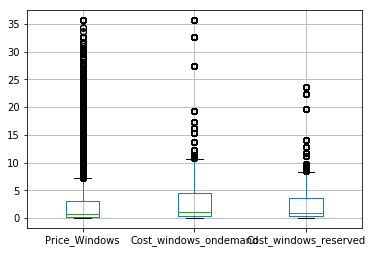

In [15]:
windows_full_dataset.boxplot(column=['Price_Windows', 'Cost_windows_ondemand', 'Cost_windows_reserved'])

Text(0, 0.5, 'Frequency')

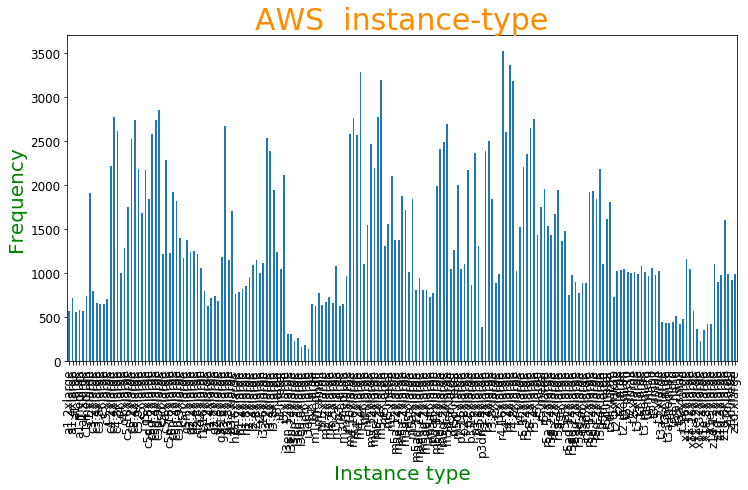

In [16]:
s=linux_full_dataset.groupby('InstanceType').size().plot("bar",figsize=(12,6),fontsize=12)
s.set_title("AWS  instance-type",color='darkorange',fontsize=30)
s.set_xlabel("Instance type",color='g',fontsize=20)
s.set_ylabel("Frequency",color='g',fontsize=20)

Text(0, 0.5, 'Frequency')

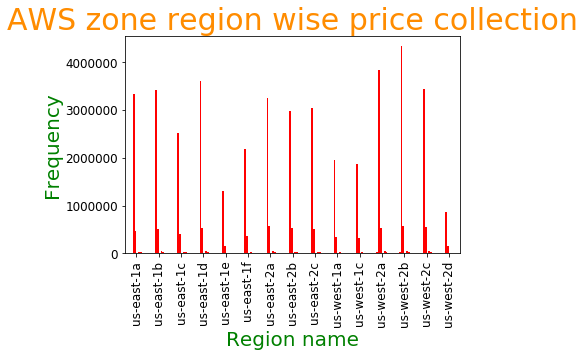

In [17]:
s=linux_full_dataset.groupby('AvailabilityZone').sum().plot(kind="bar",fontsize=12,color='r',legend=False)
s.set_title("AWS zone region wise price collection",color='darkorange',fontsize=30)
s.set_xlabel("Region name",color='g',fontsize=20)
s.set_ylabel("Frequency",color='g',fontsize=20)

In [18]:
linux_full_dataset.sample(2)

,InstanceType,Zone,Timestamp,AvailabilityZone,Price_Linux/UNIX,Memory,vCPUs,GPUs,Cost_linux_ondemand,Cost_linux_reserved
270123,i3.2xlarge,us-east-1,2019-05-22 01:34:00,us-east-1a,0.1987,61.0,8,0,0.624,0.428
345611,m5.xlarge,us-east-2,2019-05-07 10:34:00,us-east-2c,0.0399,16.0,4,0,0.192,0.123


In [19]:
linux_full_dataset['AvailabilityZone_code'] = pd.Categorical(linux_full_dataset['AvailabilityZone']).codes
linux_full_dataset['InstanceType_code'] = pd.Categorical(linux_full_dataset['InstanceType']).codes

In [20]:
linux_full_dataset.sample(3)

,InstanceType,Zone,Timestamp,AvailabilityZone,Price_Linux/UNIX,Memory,vCPUs,GPUs,Cost_linux_ondemand,Cost_linux_reserved,AvailabilityZone_code,InstanceType_code
132863,t1.micro,us-west-1,2019-04-03 04:32:00,us-west-1a,0.0025,0.613,1,0,0.025,0.017,9,157
264235,h1.2xlarge,us-east-2,2019-05-21 22:34:00,us-east-2a,0.4798,32.000,8,0,0.468,0.318,6,49
144832,c5n.xlarge,us-east-2,2019-04-04 03:51:00,us-east-2b,0.0910,10.500,4,0,0.216,0.136,7,34


In [21]:
linux_full_dataset['diff_spot_reser']=(linux_full_dataset['Cost_linux_reserved']-linux_full_dataset['Price_Linux/UNIX'])

In [22]:
linux_full_dataset['diff_spot_reser'].describe()

count    260861.000000
mean          0.470158
std           1.130857
min         -11.997000
25%           0.057700
50%           0.204100
75%           0.660700
max           9.851400
Name: diff_spot_reser, dtype: float64

In [23]:
# linux_full_dataset.groupby(['InstanceType'], as_index=False)['diff_spot_reser'].mean().sort_values(by='InstanceType')

In [24]:
# linux_full_dataset['Timestamp'].nunique()

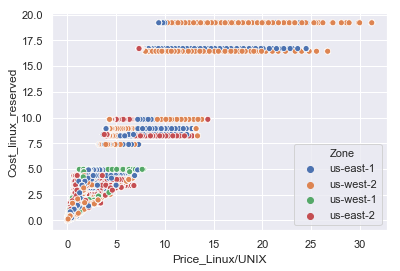

In [25]:
import seaborn as sns; sns.set()
ax = sns.scatterplot(x="Price_Linux/UNIX", y="Cost_linux_reserved",hue="Zone", data=linux_full_dataset)

# BASIC PREP

https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b

In [26]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [27]:
linux_full_dataset.columns

Index(['InstanceType', 'Zone', 'Timestamp', 'AvailabilityZone',
       'Price_Linux/UNIX', 'Memory', 'vCPUs', 'GPUs', 'Cost_linux_ondemand',
       'Cost_linux_reserved', 'AvailabilityZone_code', 'InstanceType_code',
       'diff_spot_reser'],
      dtype='object')

In [28]:
test_lin = linux_full_dataset[['Timestamp', 'Price_Linux/UNIX', 'Memory', 'vCPUs', 'GPUs', 
                               'Cost_linux_ondemand','Cost_linux_reserved', 'InstanceType_code', 'AvailabilityZone_code']].drop_duplicates()

print(test_lin.shape)
test_lin.sample(2)

(260861, 9)


,Timestamp,Price_Linux/UNIX,Memory,vCPUs,GPUs,Cost_linux_ondemand,Cost_linux_reserved,InstanceType_code,AvailabilityZone_code
79123,2019-04-02 18:24:55,0.0793,16.0,4,0,0.192,0.123,93,2
24775,2019-04-11 08:35:46,0.3320,128.0,16,0,0.904,0.570,141,1


In [29]:
test_lin['Timestamp'] = test_lin['Timestamp'].astype(np.datetime64)
test_lin = test_lin.set_index('Timestamp')
test_lin.index

DatetimeIndex(['2019-03-30 22:00:03', '2019-03-30 22:03:40',
               '2019-03-30 22:03:40', '2019-03-30 22:03:40',
               '2019-03-30 22:04:31', '2019-03-30 22:06:26',
               '2019-03-30 22:09:40', '2019-03-30 22:24:16',
               '2019-03-30 22:24:16', '2019-03-30 22:24:16',
               ...
               '2019-05-09 09:59:00', '2019-05-09 09:59:00',
               '2019-05-09 09:59:00', '2019-05-09 09:59:00',
               '2019-05-09 21:59:29', '2019-05-09 21:59:29',
               '2019-05-09 21:59:34', '2019-05-09 21:59:34',
               '2019-05-09 21:59:41', '2019-05-09 21:59:55'],
              dtype='datetime64[ns]', name='Timestamp', length=260861, freq=None)

In [30]:
test_lin.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 260861 entries, 2019-03-30 22:00:03 to 2019-05-09 21:59:55
Data columns (total 8 columns):
Price_Linux/UNIX         260861 non-null float64
Memory                   260861 non-null float64
vCPUs                    260861 non-null int64
GPUs                     260861 non-null int64
Cost_linux_ondemand      260861 non-null float64
Cost_linux_reserved      260861 non-null float64
InstanceType_code        260861 non-null int16
AvailabilityZone_code    260861 non-null int8
dtypes: float64(4), int16(1), int64(2), int8(1)
memory usage: 14.7 MB


In [31]:
# furniture.drop(cols, axis=1, inplace=True)
test_lin = test_lin.sort_values('Timestamp')
test_lin.isnull().sum()

Price_Linux/UNIX         0
Memory                   0
vCPUs                    0
GPUs                     0
Cost_linux_ondemand      0
Cost_linux_reserved      0
InstanceType_code        0
AvailabilityZone_code    0
dtype: int64

In [74]:
y = test_lin['Price_Linux/UNIX'].resample('1H', label='right').mean().fillna(method='pad')

In [76]:
# y

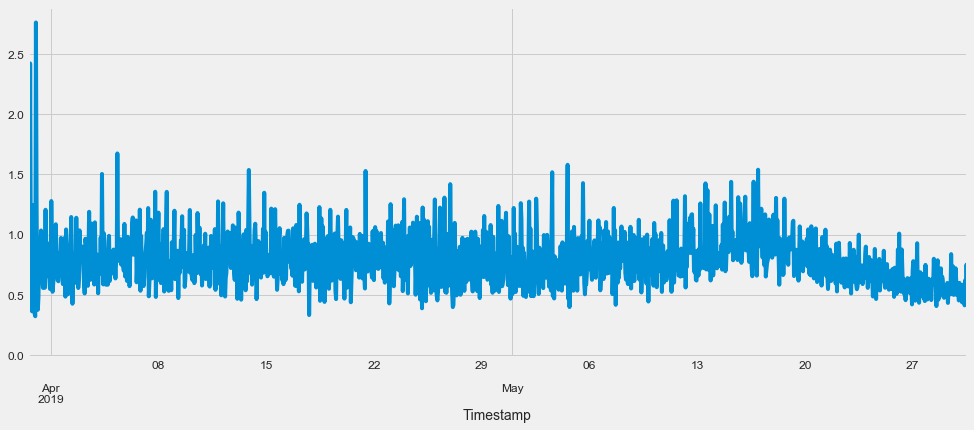

In [77]:
y.plot(figsize=(15, 6))
plt.show()

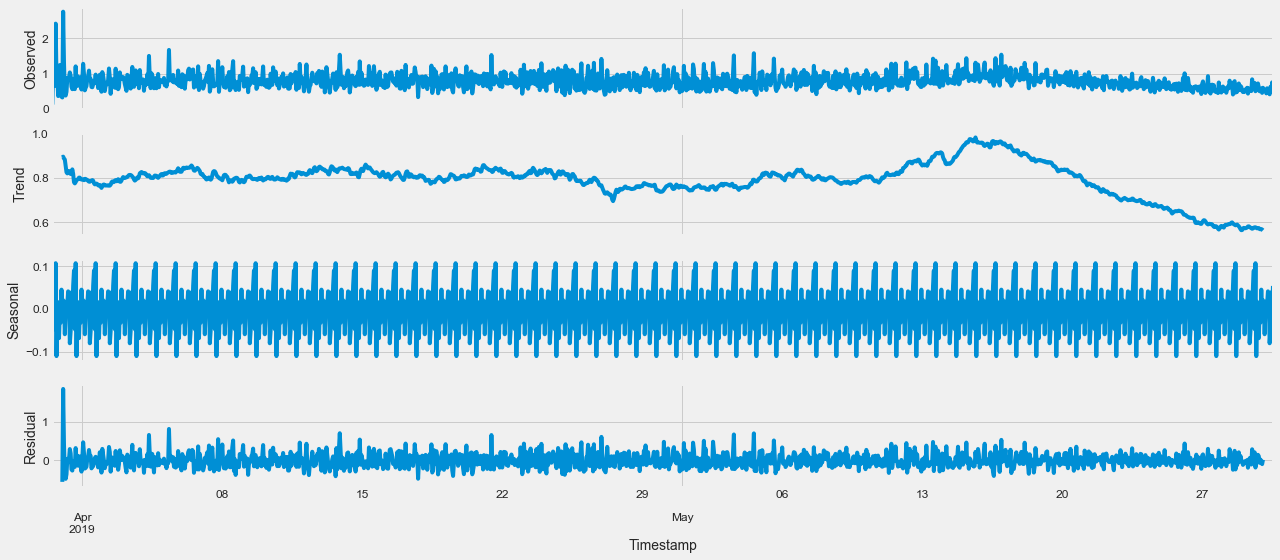

In [78]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [79]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [80]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:3579.259278456683
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2492.018655522532
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:307.99631527926874
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:-777.3881184833929


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:263.0210673895502
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:-657.7129939306517
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:-985.4202278221026
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:-1018.6441994027207
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2361.2743276503916
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1810.9729264242692
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:267.90828901321237
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:-794.5720259772243
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:264.1212924501933
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:-655.5086781798296
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:-990.5024936947302
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:-1047.192593565801
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:467.5109639782224
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:311.1247901813423
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:1375.551256545522
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:230.12482435196952
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:388.3467342096214
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:222.100784303682

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:-323.76078021438013
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:-369.1623259973485
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:-548.049764378162
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:-652.3885734454124
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:300.6765743873731
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:-820.0907019371855
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:-700.489344789575
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:-763.7989032057653
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:-998.8187675482725


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:-1033.4097485208317


### Fitting the ARIMA model

In [81]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0583      0.024     -2.432      0.015      -0.105      -0.011
ma.L1         -1.0009      0.005   -188.733      0.000      -1.011      -0.990
ar.S.L12      -0.7138      0.012    -61.868      0.000      -0.736      -0.691
sigma2         0.0289      0.001     31.275      0.000       0.027       0.031


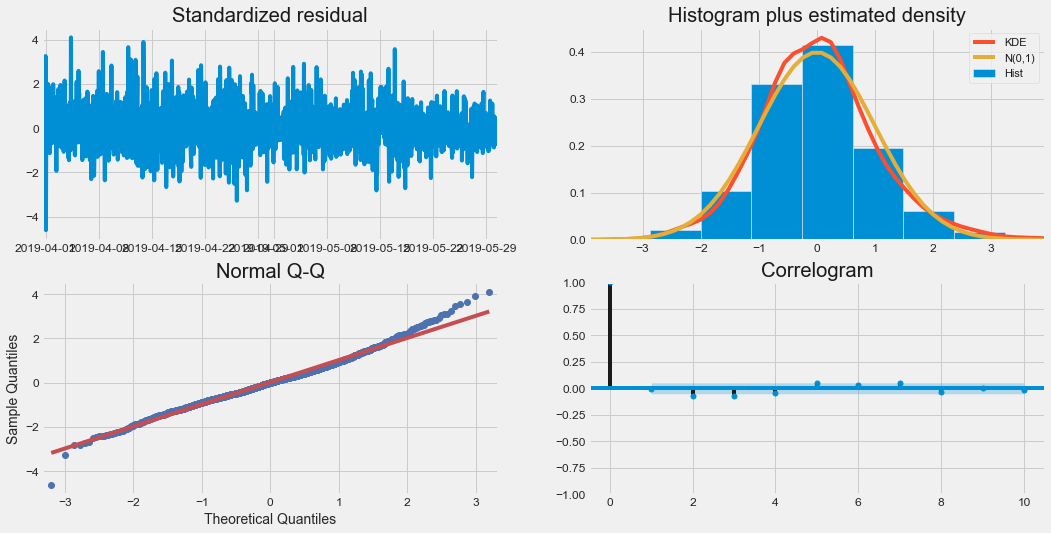

In [82]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

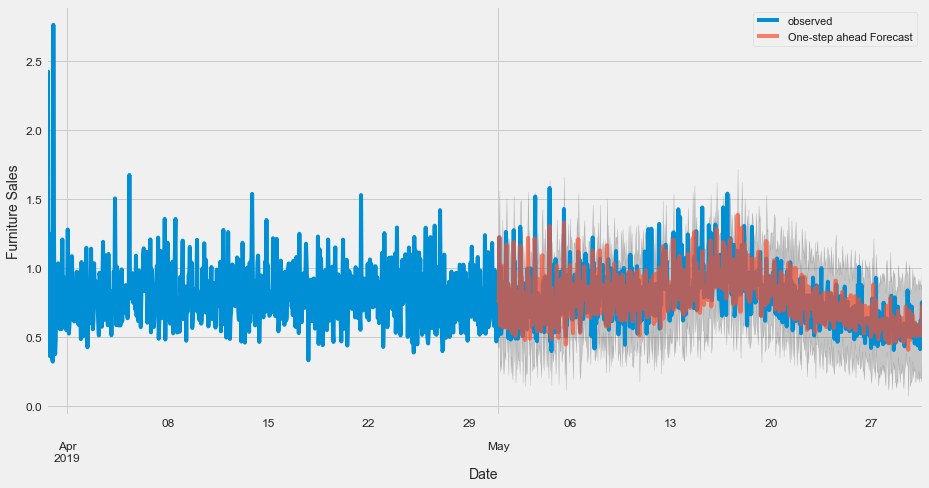

In [83]:
# VALIDATION
pred = results.get_prediction(start=pd.to_datetime('2019-05-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2019':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [84]:
y_forecasted = pred.predicted_mean
y_truth = y['2019-04-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.02


In [85]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 0.15


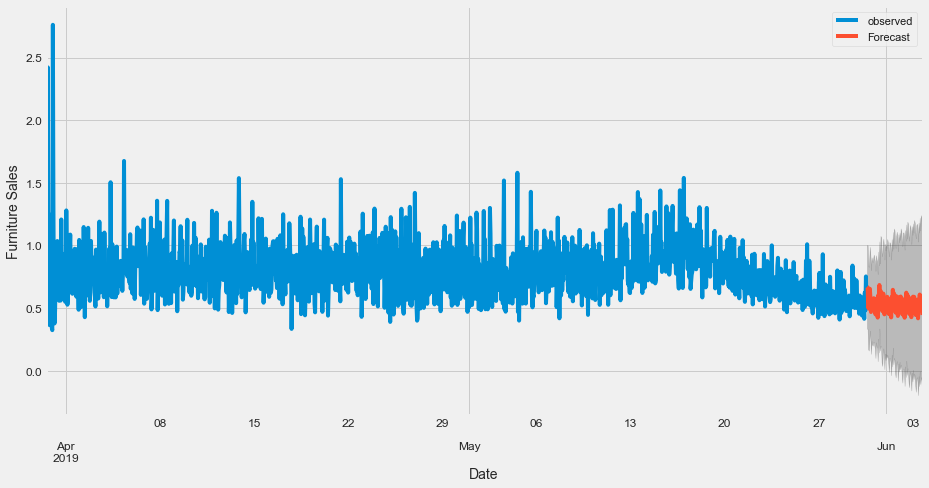

In [88]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [180]:
# df.isna().sum()

http://drivendata.co/blog/benchmark-cold-start-lstm-deep-learning/

In [185]:
%matplotlib inline

# plotting
import matplotlib as mpl
mpl.style.use('ggplot')
import matplotlib.pyplot as plt

# math and data manipulation
import numpy as np
import pandas as pd

# to handle paths
from pathlib import Path

# set random seeds 
from numpy.random import seed
from tensorflow import set_random_seed

RANDOM_SEED = 2019
seed(RANDOM_SEED)
set_random_seed(RANDOM_SEED)

In [187]:
test_lin.columns

Index(['Timestamp', 'Price_Linux/UNIX', 'Memory', 'vCPUs', 'GPUs',
       'Cost_linux_ondemand', 'Cost_linux_reserved', 'InstanceType_code',
       'AvailabilityZone_code'],
      dtype='object')

In [189]:
test = test_lin[['InstanceType_code','Timestamp', 'Price_Linux/UNIX', 'Memory', 'vCPUs', 'GPUs','AvailabilityZone_code']]

In [192]:
# test[test['InstanceType_code']==190]

# TRAIN DATA

In [212]:
consumption_train = pd.read_csv('linux_data_clean.csv', parse_dates=['Timestamp'])
consumption_train.head()

,InstanceType,Zone,Timestamp,AvailabilityZone,Price_Linux/UNIX,Memory,vCPUs,GPUs,Cost_linux_ondemand,Cost_linux_reserved
0,r5ad.4xlarge,us-east-1,2019-03-30 22:00:03,us-east-1f,0.285,128.0,16,0,1.048,0.664
1,m5d.4xlarge,us-east-1,2019-03-30 22:00:55,us-east-1a,NaN,64.0,16,0,0.904,0.576
2,m5d.4xlarge,us-east-1,2019-03-30 22:00:55,us-east-1b,NaN,64.0,16,0,0.904,0.576
3,m5d.4xlarge,us-east-1,2019-03-30 22:00:55,us-east-1c,NaN,64.0,16,0,0.904,0.576
4,m5d.4xlarge,us-east-1,2019-03-30 22:00:55,us-east-1d,NaN,64.0,16,0,0.904,0.576


In [213]:
consumption_train.columns

Index(['InstanceType', 'Zone', 'Timestamp', 'AvailabilityZone',
       'Price_Linux/UNIX', 'Memory', 'vCPUs', 'GPUs', 'Cost_linux_ondemand',
       'Cost_linux_reserved'],
      dtype='object')

In [214]:
consumption_train = consumption_train[['InstanceType','Timestamp',	'Memory','AvailabilityZone','vCPUs',	'GPUs','Price_Linux/UNIX']].dropna().drop_duplicates()

In [216]:
consumption_train['AvailabilityZone']= pd.Categorical(consumption_train['AvailabilityZone']).codes

In [217]:
consumption_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261253 entries, 0 to 363325
Data columns (total 7 columns):
InstanceType        261253 non-null object
Timestamp           261253 non-null datetime64[ns]
Memory              261253 non-null float64
AvailabilityZone    261253 non-null int8
vCPUs               261253 non-null int64
GPUs                261253 non-null int64
Price_Linux/UNIX    261253 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(2), int8(1), object(1)
memory usage: 14.2+ MB


In [218]:
def describe_training_data(train_df):
    num_training_series = train_df.InstanceType.nunique()
    num_training_days = num_training_series * 28
    num_training_hours = num_training_days * 24
#     assert num_training_hours == train_df.shape[0]
    
    desc = f'There are {num_training_series} training ' \
           f'series totaling {num_training_days} days ' \
           f'({num_training_hours} hours) of consumption data.'
    
    print(desc)
    
describe_training_data(consumption_train)

There are 193 training series totaling 5404 days (129696 hours) of consumption data.


In [206]:
consumption_train.shape[0]

261253

In [210]:
# choose subset of series for training
frac_series_to_use = 0.01

rng = np.random.RandomState(seed=RANDOM_SEED)
series_ids = consumption_train.InstanceType.unique()
series_mask = rng.binomial(1,
                           frac_series_to_use,
                           size=series_ids.shape).astype(bool)

training_series = series_ids[series_mask]

# reduce training data to series subset
consumption_train = consumption_train[consumption_train.InstanceType.isin(training_series)]

# describe the reduced set
describe_training_data(consumption_train)

There are 2 training series totaling 56 days (1344 hours) of consumption data.


# TEST DATA

In [220]:
cold_start_test = pd.read_csv('windows_data_clean.csv', parse_dates=['Timestamp'])
cold_start_test.head()

,InstanceType,Zone,Timestamp,AvailabilityZone,Price_Windows,Memory,vCPUs,GPUs,Cost_windows_ondemand,Cost_windows_reserved
0,r5ad.4xlarge,us-east-1,2019-03-30 22:00:03,us-east-1f,NaN,128.0,16,0,1.784,1.400
1,m5d.4xlarge,us-east-1,2019-03-30 22:00:55,us-east-1a,1.0081,64.0,16,0,1.640,1.312
2,m5d.4xlarge,us-east-1,2019-03-30 22:00:55,us-east-1b,1.0081,64.0,16,0,1.640,1.312
3,m5d.4xlarge,us-east-1,2019-03-30 22:00:55,us-east-1c,1.0081,64.0,16,0,1.640,1.312
4,m5d.4xlarge,us-east-1,2019-03-30 22:00:55,us-east-1d,1.0081,64.0,16,0,1.640,1.312


In [222]:
cold_start_test = cold_start_test[['InstanceType','Timestamp',	'Memory','AvailabilityZone','vCPUs',	'GPUs','Price_Windows']].dropna().drop_duplicates()

In [224]:
cold_start_test['AvailabilityZone']= pd.Categorical(cold_start_test['AvailabilityZone']).codes

# Explore Data

In [239]:
submission_format = cold_start_test[cold_start_test['InstanceType']=='m5d.4xlarge'].copy()
submission_format['prediction_window']='hourly'

In [240]:
submission_format.head()

,InstanceType,Timestamp,Memory,AvailabilityZone,vCPUs,GPUs,Price_Windows,prediction_window
1,m5d.4xlarge,2019-03-30 22:00:55,64.0,0,16,0,1.0081,hourly
2,m5d.4xlarge,2019-03-30 22:00:55,64.0,1,16,0,1.0081,hourly
3,m5d.4xlarge,2019-03-30 22:00:55,64.0,2,16,0,1.0081,hourly
4,m5d.4xlarge,2019-03-30 22:00:55,64.0,3,16,0,1.0081,hourly
5,m5d.4xlarge,2019-03-30 22:00:55,64.0,5,16,0,1.0081,hourly


In [241]:
# confirm that every series asks for only one type of prediction
assert all(1 == submission_format.groupby('InstanceType').prediction_window.nunique())

# use the first() prediction window value from a series_id so as not to overcount
submission_format.groupby('InstanceType').prediction_window.first().value_counts()

hourly    1
Name: prediction_window, dtype: int64

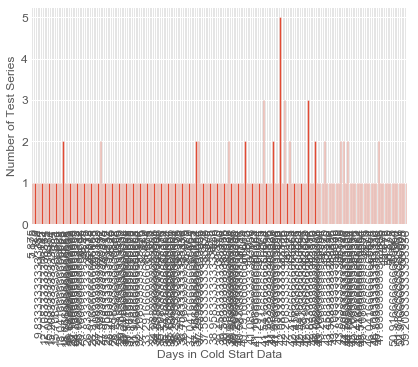

In [242]:
ax = (cold_start_test.groupby('InstanceType').count()
                                           .Timestamp
                                           .divide(24)
                                           .value_counts()
                                           .sort_index()
                                           .plot.bar())
ax.set_xlabel('Days in Cold Start Data')
ax.set_ylabel('Number of Test Series')
plt.show()

In [243]:
# add prediction_window to the test data
pred_windows = submission_format[['InstanceType', 'prediction_window']].drop_duplicates()
cold_start_test = cold_start_test.merge(pred_windows, on='InstanceType')

num_cold_start_days_provided = (cold_start_test.groupby('InstanceType')
                                               .prediction_window
                                               .value_counts()
                                               .divide(24))

num_cold_start_days_provided.head()

InstanceType  prediction_window
m5d.4xlarge   hourly               42.0
Name: prediction_window, dtype: float64

In [244]:
def _count_cold_start_days(subdf):
    """ Get the number of times a certain cold-start period
        appears in the data.
    """
    return (subdf.InstanceType
                 .value_counts()
                 .divide(24)  # hours to days 
                 .value_counts())

cold_start_occurrence = (cold_start_test.groupby('prediction_window')
                                        .apply(_count_cold_start_days))

cold_start_occurrence.head()

InstanceType,42.0
prediction_window,
hourly,1


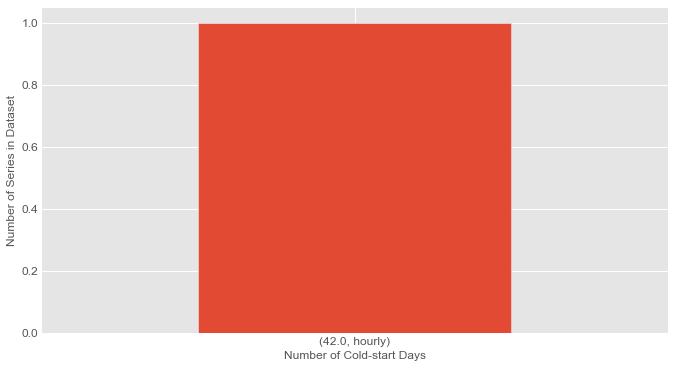

In [245]:
ax = cold_start_occurrence.unstack(0).plot.bar(figsize=(10, 6),
                                               rot=0)

ax.set_xlabel('Number of Cold-start Days')
ax.set_ylabel('Number of Series in Dataset');

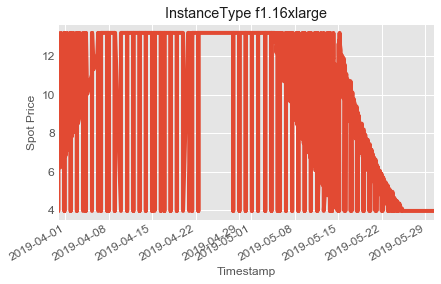

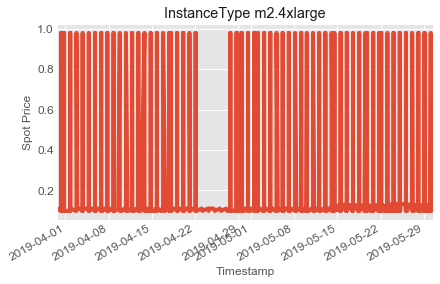

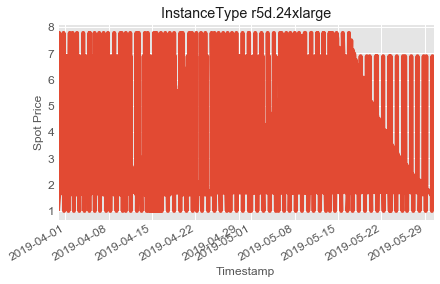

In [250]:
# plot a few consumption patterns
series_to_plot = rng.choice(consumption_train.InstanceType.unique(), 3)

for ser_id in series_to_plot:
    ser_data = consumption_train[consumption_train.InstanceType == ser_id]
    ax = ser_data.plot(x='Timestamp',
                       y='Price_Linux/UNIX', 
                       title=f"InstanceType {str(ser_id)}",
                       legend=False)
    plt.ylabel('Spot Price')
    plt.show()

In [251]:
(consumption_train.groupby('InstanceType')
                  .Timestamp
                  .apply(lambda x: x.max() - x.min())
                  .value_counts())

60 days 17:54:00    2
60 days 11:09:00    2
60 days 19:11:00    2
60 days 22:18:00    2
60 days 18:01:00    2
60 days 20:41:48    1
60 days 09:07:00    1
60 days 20:43:13    1
60 days 20:18:35    1
60 days 03:03:00    1
35 days 00:07:13    1
60 days 16:51:56    1
22 days 09:43:13    1
60 days 15:01:11    1
60 days 15:47:33    1
60 days 10:18:23    1
60 days 21:18:00    1
60 days 20:41:00    1
60 days 23:13:39    1
60 days 16:24:14    1
60 days 15:10:31    1
60 days 14:04:03    1
60 days 18:50:05    1
60 days 18:34:47    1
60 days 06:02:00    1
60 days 17:03:53    1
60 days 08:13:03    1
60 days 20:33:52    1
60 days 11:03:00    1
60 days 17:07:19    1
                   ..
60 days 19:44:29    1
35 days 14:24:22    1
59 days 23:41:30    1
60 days 00:39:07    1
60 days 16:53:46    1
60 days 19:34:49    1
60 days 19:38:28    1
35 days 10:22:32    1
60 days 11:44:16    1
60 days 04:22:47    1
60 days 17:15:12    1
60 days 20:19:38    1
60 days 14:49:36    1
60 days 12:22:47    1
22 days 05

# BUILDING LSTM MODEL

In [257]:
def create_lagged_features(df, lag=1):
    if not type(df) == pd.DataFrame:
        df = pd.DataFrame(df, columns=['Price_Linux/UNIX'])
    
    def _rename_lag(ser, j):
        ser.name = ser.name + f'_{j}'
        return ser
        
    # add a column lagged by `i` steps
    for i in range(1, lag + 1):
        df = df.join(df['Price_Linux/UNIX'].shift(i).pipe(_rename_lag, i))

    df.dropna(inplace=True)
    return df

# example series
test_series = consumption_train#[consumption_train['Price_Linux/UNIX'] == 'a1.xlarge']
create_lagged_features(test_series['Price_Linux/UNIX'], lag=3).head()

,Price_Linux/UNIX,Price_Linux/UNIX_1,Price_Linux/UNIX_2,Price_Linux/UNIX_3
8,0.0336,0.0336,0.0336,0.2850
9,0.0354,0.0336,0.0336,0.0336
10,1.1400,0.0354,0.0336,0.0336
11,0.0087,1.1400,0.0354,0.0336
12,0.0245,0.0087,1.1400,0.0354


In [259]:
from sklearn.preprocessing import MinMaxScaler

def prepare_training_data(consumption_series, lag):
    """ Converts a series of consumption data into a
        lagged, scaled sample.
    """
    # scale training data
    scaler = MinMaxScaler(feature_range=(-1, 1))
    consumption_vals = scaler.fit_transform(consumption_series.values.reshape(-1, 1))
    
    # convert consumption series to lagged features
    consumption_lagged = create_lagged_features(consumption_vals, lag=lag)

    # X, y format taking the first column (original time series) to be the y
    X = consumption_lagged.drop('Price_Linux/UNIX', axis=1).values
    y = consumption_lagged['Price_Linux/UNIX'].values
    
    # keras expects 3 dimensional X
    X = X.reshape(X.shape[0], 1, X.shape[1])
    
    return X, y, scaler

_X, _y, scaler = prepare_training_data(test_series['Price_Linux/UNIX'], 5)
print(_X.shape)
print(_y.shape)
print(scaler)

(261248, 1, 5)
(261248,)
MinMaxScaler(copy=True, feature_range=(-1, 1))


In [260]:
# modeling
import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense

# progress bar
from tqdm import tqdm

In [261]:
# lag of 24 to simulate smallest cold start window. Our series
# will be converted to a num_timesteps x lag size matrix
lag =  24

# model parameters
num_neurons = 24
batch_size = 1  # this forces the lstm to step through each time-step one at a time
batch_input_shape=(batch_size, 1, lag)

# instantiate a sequential model
model = Sequential()

# add LSTM layer - stateful MUST be true here in 
# order to learn the patterns within a series
model.add(LSTM(units=num_neurons, 
              batch_input_shape=batch_input_shape, 
              stateful=True))

# followed by a dense layer with a single output for regression
model.add(Dense(1))

# compile
model.compile(loss='mean_absolute_error', optimizer='adam')

In [264]:
consumption_train_1 = consumption_train[0:500]

In [266]:
# consumption_train_1

In [268]:
%%time
num_training_series = consumption_train_1.InstanceType.nunique()
num_passes_through_data = 3

for i in tqdm(range(num_passes_through_data), 
              total=num_passes_through_data, 
              desc='Learning Consumption Trends - Epoch'):
    
    # reset the LSTM state for training on each series
    for ser_id, ser_data in consumption_train_1.groupby('InstanceType'):

        # prepare the data
        X, y, scaler = prepare_training_data(ser_data['Price_Linux/UNIX'], lag)

        # fit the model: note that we don't shuffle batches (it would ruin the sequence)
        # and that we reset states only after an entire X has been fit, instead of after
        # each (size 1) batch, as is the case when stateful=False
        model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
        model.reset_states()



Learning Consumption Trends - Epoch:   0%|                                                       | 0/3 [00:00<?, ?it/s]

Learning Consumption Trends - Epoch:  33%|███████████████▋                               | 1/3 [00:05<00:10,  5.14s/it]

Learning Consumption Trends - Epoch:  67%|███████████████████████████████▎               | 2/3 [00:10<00:05,  5.19s/it]

Learning Consumption Trends - Epoch: 100%|███████████████████████████████████████████████| 3/3 [00:15<00:00,  5.23s/it]

Wall time: 15.8 s


# FORECASTING

In [269]:
def generate_hourly_forecast(num_pred_hours, consumption, model, scaler, lag):
    """ Uses last hour's prediction to generate next for num_pred_hours, 
        initialized by most recent cold start prediction. Inverts scale of 
        predictions before return.
    """
    # allocate prediction frame
    preds_scaled = np.zeros(num_pred_hours)
    
    # initial X is last lag values from the cold start
    X = scaler.transform(consumption.values.reshape(-1, 1))[-lag:]
    
    # forecast
    for i in range(num_pred_hours):
        # predict scaled value for next time step
        yhat = model.predict(X.reshape(1, 1, lag), batch_size=1)[0][0]
        preds_scaled[i] = yhat
        
        # update X to be latest data plus prediction
        X = pd.Series(X.ravel()).shift(-1).fillna(yhat).values

    # revert scale back to original range
    hourly_preds = scaler.inverse_transform(preds_scaled.reshape(-1, 1)).ravel()
    return hourly_preds

In [270]:
cold_start_test_1 = cold_start_test[0:500]

In [284]:
my_submission = submission_format[0:500].copy()

In [296]:
# my_submission
# cold_start_test_1

In [297]:
%%time
pred_window_to_num_preds = {'hourly': 24, 'daily': 7, 'weekly': 2}
pred_window_to_num_pred_hours = {'hourly': 24, 'daily': 7 * 24, 'weekly': 2 * 7 * 24}

num_test_series = my_submission.InstanceType.nunique()

model.reset_states()

for ser_id, pred_df in tqdm(my_submission.groupby('InstanceType'), 
                            total=num_test_series, 
                            desc="Forecasting from Cold Start Data"):
        
    # get info about this series' prediction window
    pred_window = pred_df.prediction_window.unique()[0]
    num_preds = pred_window_to_num_preds[pred_window]
    num_pred_hours = pred_window_to_num_pred_hours[pred_window]
    
    # prepare cold start data
    series_data = cold_start_test_1[cold_start_test_1.InstanceType == 'm5d.4xlarge'].Price_Windows
    cold_X, cold_y, scaler = prepare_training_data(series_data, lag)
    
    # fine tune our lstm model to this site using cold start data    
    model.fit(cold_X, cold_y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
    
    # make hourly forecasts for duration of pred window
    preds = generate_hourly_forecast(num_pred_hours, series_data, model, scaler, lag)
    
    # reduce by taking sum over each sub window in pred window
    reduced_preds = [pred.sum() for pred in np.split(preds, num_preds)]
    
    # store result in submission DataFrame
    ser_id_mask = cold_start_test_1.InstanceType == ser_id
    my_submission.loc[ser_id_mask, 'Price_Windows'] = reduced_preds




Forecasting from Cold Start Data:   0%|                                                          | 0/1 [00:00<?, ?it/s]

IndexingError: (0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26     True
27     True
28     True
29     True
       ... 
470    True
471    True
472    True
473    True
474    True
475    True
476    True
477    True
478    True
479    True
480    True
481    True
482    True
483    True
484    True
485    True
486    True
487    True
488    True
489    True
490    True
491    True
492    True
493    True
494    True
495    True
496    True
497    True
498    True
499    True
Name: InstanceType, Length: 500, dtype: bool, 'Price_Windows')

In [292]:
cold_start_test_1[cold_start_test_1.InstanceType == ser_id]['Price_Windows']

Series([], Name: Price_Windows, dtype: float64)

In [289]:
# pred_df.prediction_window.unique()

# START LSTM

In [106]:
# train_size = int(len(test_lin) * 0.80)
# test_size = len(test_lin) - train_size
# train, test = test_lin[:,0:train_size], test_lin[train_size:len(test_lin),:]
# print(len(train), len(test))


# # split into train and test sets
# values = reframed.values
# n_train_hours = 365 * 480 #change this to change train and test dataset
# train_size = values[:n_train_hours, :]
# test_size = values[n_train_hours:, :]
# # split into input and outputs
# train_X, train_y = train[:, :-1], train[:, -1]
# test_X, test_y = test[:, :-1], test[:, -1]
# # reshape input to be 3D [samples, timesteps, features]
# train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
# test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
# print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

In [89]:
# test_lin_1 = test_lin.reset_index()

In [90]:
# # convert series to supervised learning
# def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
# 	n_vars = 1 if type(data) is list else data.shape[1]
# 	df = pd.DataFrame(data)
# 	cols, names = list(), list()
# 	# input sequence (t-n, ... t-1)
# 	for i in range(n_in, 0, -1):
# 		cols.append(df.shift(i))
# 		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
# 	# forecast sequence (t, t+1, ... t+n)
# 	for i in range(0, n_out):
# 		cols.append(df.shift(-i))
# 		if i == 0:
# 			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
# 		else:
# 			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
# 	# put it all together
# 	agg = pd.concat(cols, axis=1)
# 	agg.columns = names
# 	# drop rows with NaN values
# 	if dropnan:
# 		agg.dropna(inplace=True)
# 	return agg

In [91]:
# test_lin_1.sample(2)

In [92]:
# test_lin_1.columns

In [49]:
# test_lin_1 = test_lin_1.sort_values('Timestamp')

In [109]:
Spot_Price = test_lin.loc[:,'Price_Linux/UNIX'].as_matrix()
train_data = Spot_Price[:1100]
test_data = Spot_Price[1100:]

In [114]:
Spot_Price

array([0.211 , 0.211 , 0.2814, ..., 0.0658, 0.137 , 0.0326])

In [93]:
# train_data

In [94]:
# # Scale the data to be between 0 and 1
# # When scaling remember! You normalize both test and train data with respect to training data
# # Because you are not supposed to have access to test data
# scaler = MinMaxScaler()
# train_data = train_data.reshape(-1,1)
# test_data = test_data.reshape(-1,1)

In [95]:
# # # Train the Scaler with training data and smooth data
# smoothing_window_size = 11000
# for di in range(0,11000,smoothing_window_size):
#     scaler.fit(train_data[di:di+smoothing_window_size,:])
#     train_data[di:di+smoothing_window_size,:] = scaler.transform(train_data[di:di+smoothing_window_size,:])
    
    
# # # You normalize the last bit of remaining data
# # scaler.fit(train_data[di+smoothing_window_size:,:])
# # train_data[di+smoothing_window_size:,:] = scaler.transform(train_data[di+smoothing_window_size:,:])

In [96]:
# # Reshape both train and test data
# train_data = train_data.reshape(-1)

# # Normalize test data
# test_data = scaler.transform(test_data).reshape(-1)

In [97]:
# # Now perform exponential moving average smoothing
# # So the data will have a smoother curve than the original ragged data
# EMA = 0.0
# gamma = 0.1
# for ti in range(1100):
#     EMA = gamma*train_data[ti] + (1-gamma)*EMA
#     train_data[ti] = EMA

# # Used for visualization and test purposes
# all_mid_data = np.concatenate([train_data,test_data],axis=0)

In [98]:
# import time
# from datetime import datetime, date, time, timedelta
# window_size = 100
# N = train_data.size
# std_avg_predictions = []
# std_avg_x = []
# mse_errors = []

# for pred_idx in range(window_size,N):

#     if pred_idx >= N:
# #         date = dt.datetime.strptime(k, '%Y-%m-%d').date() + dt.timedelta(days=1)
#         date = dt.datetime.strptime('Timestamp', '%Y-%m-%d %H:%M:%S').date() + dt.timedelta(hours=1)
#     else:
#         date = test_lin_1.loc[:,'Timestamp']

#     std_avg_predictions.append(np.mean(train_data[pred_idx-window_size:pred_idx]))
#     mse_errors.append((std_avg_predictions[-1]-train_data[pred_idx])**2)
#     std_avg_x.append(date)

# print('MSE error for standard averaging: %.5f'%(0.5*np.mean(mse_errors)))

In [99]:
# plt.figure(figsize = (18,9))
# plt.plot(range(test_lin_1.shape[0]),all_mid_data,color='b',label='True')
# plt.plot(range(window_size,N),std_avg_predictions,color='orange',label='Prediction')
# #plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
# plt.xlabel('Date')
# plt.ylabel('Price')
# plt.legend(fontsize=18)
# plt.show()

In [100]:
# window_size = 100
# N = train_data.size

# run_avg_predictions = []
# run_avg_x = []

# mse_errors = []

# running_mean = 0.0
# run_avg_predictions.append(running_mean)

# decay = 0.5

# for pred_idx in range(1,N):

#     running_mean = running_mean*decay + (1.0-decay)*train_data[pred_idx-1]
#     run_avg_predictions.append(running_mean)
#     mse_errors.append((run_avg_predictions[-1]-train_data[pred_idx])**2)
#     run_avg_x.append(date)

# print('MSE error for EMA averaging: %.5f'%(0.5*np.mean(mse_errors)))

In [101]:
# plt.figure(figsize = (18,9))
# plt.plot(range(test_lin_1.shape[0]),all_mid_data,color='b',label='True')
# plt.plot(range(0,N),run_avg_predictions,color='orange', label='Prediction')
# #plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
# plt.xlabel('Date')
# plt.ylabel('Mid Price')
# plt.legend(fontsize=18)
# plt.show()

# LSTM

- https://www.datacamp.com/community/tutorials/lstm-python-stock-market

In [75]:
class DataGeneratorSeq(object):

    def __init__(self,prices,batch_size,num_unroll):
        self._prices = prices
        self._prices_length = len(self._prices) - num_unroll
        self._batch_size = batch_size
        self._num_unroll = num_unroll
        self._segments = self._prices_length //self._batch_size
        self._cursor = [offset * self._segments for offset in range(self._batch_size)]

    def next_batch(self):

        batch_data = np.zeros((self._batch_size),dtype=np.float32)
        batch_labels = np.zeros((self._batch_size),dtype=np.float32)

        for b in range(self._batch_size):
            if self._cursor[b]+1>=self._prices_length:
                #self._cursor[b] = b * self._segments
                self._cursor[b] = np.random.randint(0,(b+1)*self._segments)

            batch_data[b] = self._prices[self._cursor[b]]
            batch_labels[b]= self._prices[self._cursor[b]+np.random.randint(0,5)]

            self._cursor[b] = (self._cursor[b]+1)%self._prices_length

        return batch_data,batch_labels

    def unroll_batches(self):

        unroll_data,unroll_labels = [],[]
        init_data, init_label = None,None
        for ui in range(self._num_unroll):

            data, labels = self.next_batch()    

            unroll_data.append(data)
            unroll_labels.append(labels)

        return unroll_data, unroll_labels

    def reset_indices(self):
        for b in range(self._batch_size):
            self._cursor[b] = np.random.randint(0,min((b+1)*self._segments,self._prices_length-1))

In [76]:
dg = DataGeneratorSeq(train_data,5,5)
u_data, u_labels = dg.unroll_batches()

for ui,(dat,lbl) in enumerate(zip(u_data,u_labels)):   
    print('\n\nUnrolled index %d'%ui)
    dat_ind = dat
    lbl_ind = lbl
    print('\tInputs: ',dat )
    print('\n\tOutput:',lbl)



Unrolled index 0
	Inputs:  [0.00067093 0.02911127 0.00433571 0.10440876 0.03606704]

	Output: [0.00067093 0.03551234 0.00389301 0.07265542 0.03649273]


Unrolled index 1
	Inputs:  [0.00127477 0.02799826 0.00410271 0.09583072 0.03619083]

	Output: [0.00266213 0.02638522 0.00354312 0.08892464 0.03649273]


Unrolled index 2
	Inputs:  [0.00204379 0.02638522 0.00389301 0.08892464 0.03630223]

	Output: [0.00266213 0.0555412  0.00389301 0.07265542 0.03640249]


Unrolled index 3
	Inputs:  [0.00204126 0.02379956 0.00354312 0.08025582 0.03640249]

	Output: [0.00204126 0.0555412  0.0026593  0.07265542 0.02971861]


Unrolled index 4
	Inputs:  [0.00273363 0.03551234 0.00322822 0.07265542 0.03649273]

	Output: [0.00273363 0.03551234 0.00294481 0.05362406 0.02971861]


In [77]:
# from pandas_datareader import data
import urllib.request, json
import os
import numpy.core.multiarray
import tensorflow as tf # This code has been tested with TensorFlow 1.6
from sklearn.preprocessing import MinMaxScaler

In [78]:
D = 1 # Dimensionality of the data. Since your data is 1-D this would be 1
num_unrollings = 50 # Number of time steps you look into the future.
batch_size = 500 # Number of samples in a batch
num_nodes = [200,200,150] # Number of hidden nodes in each layer of the deep LSTM stack we're using
n_layers = len(num_nodes) # number of layers
dropout = 0.2 # dropout amount

tf.reset_default_graph() # This is important in case you run this multiple times

In [79]:
# train_inputs

In [80]:
# Input data.
train_inputs, train_outputs = [],[]

# You unroll the input over time defining placeholders for each time step
for ui in range(num_unrollings):
    train_inputs.append(tf.placeholder(tf.float32, shape=[batch_size,D],name='train_inputs_%d'%ui))
    train_outputs.append(tf.placeholder(tf.float32, shape=[batch_size,1], name = 'train_outputs_%d'%ui))

In [81]:
lstm_cells = [
    tf.contrib.rnn.LSTMCell(num_units=num_nodes[li],
                            state_is_tuple=True,
                            initializer= tf.contrib.layers.xavier_initializer()
                           )
 for li in range(n_layers)]

drop_lstm_cells = [tf.contrib.rnn.DropoutWrapper(
    lstm, input_keep_prob=1.0,output_keep_prob=1.0-dropout, state_keep_prob=1.0-dropout
) for lstm in lstm_cells]
drop_multi_cell = tf.contrib.rnn.MultiRNNCell(drop_lstm_cells)
multi_cell = tf.contrib.rnn.MultiRNNCell(lstm_cells)

w = tf.get_variable('w',shape=[num_nodes[-1], 1], initializer=tf.contrib.layers.xavier_initializer())
b = tf.get_variable('b',initializer=tf.random_uniform([1],-0.1,0.1))

In [82]:
# Create cell state and hidden state variables to maintain the state of the LSTM
c, h = [],[]
initial_state = []
for li in range(n_layers):
  c.append(tf.Variable(tf.zeros([batch_size, num_nodes[li]]), trainable=False))
  h.append(tf.Variable(tf.zeros([batch_size, num_nodes[li]]), trainable=False))
  initial_state.append(tf.contrib.rnn.LSTMStateTuple(c[li], h[li]))

# Do several tensor transofmations, because the function dynamic_rnn requires the output to be of
# a specific format. Read more at: https://www.tensorflow.org/api_docs/python/tf/nn/dynamic_rnn
all_inputs = tf.concat([tf.expand_dims(t,0) for t in train_inputs],axis=0)

# all_outputs is [seq_length, batch_size, num_nodes]
all_lstm_outputs, state = tf.nn.dynamic_rnn(
    drop_multi_cell, all_inputs, initial_state=tuple(initial_state),
    time_major = True, dtype=tf.float32)

all_lstm_outputs = tf.reshape(all_lstm_outputs, [batch_size*num_unrollings,num_nodes[-1]])

all_outputs = tf.nn.xw_plus_b(all_lstm_outputs,w,b)

split_outputs = tf.split(all_outputs,num_unrollings,axis=0)

In [83]:
# When calculating the loss you need to be careful about the exact form, because you calculate
# loss of all the unrolled steps at the same time
# Therefore, take the mean error or each batch and get the sum of that over all the unrolled steps

print('Defining training Loss')
loss = 0.0
with tf.control_dependencies([tf.assign(c[li], state[li][0]) for li in range(n_layers)]+
                             [tf.assign(h[li], state[li][1]) for li in range(n_layers)]):
  for ui in range(num_unrollings):
    loss += tf.reduce_mean(0.5*(split_outputs[ui]-train_outputs[ui])**2)

print('Learning rate decay operations')
global_step = tf.Variable(0, trainable=False)
inc_gstep = tf.assign(global_step,global_step + 1)
tf_learning_rate = tf.placeholder(shape=None,dtype=tf.float32)
tf_min_learning_rate = tf.placeholder(shape=None,dtype=tf.float32)

learning_rate = tf.maximum(
    tf.train.exponential_decay(tf_learning_rate, global_step, decay_steps=1, decay_rate=0.5, staircase=True),
    tf_min_learning_rate)

# Optimizer.
print('TF Optimization operations')
optimizer = tf.train.AdamOptimizer(learning_rate)
gradients, v = zip(*optimizer.compute_gradients(loss))
gradients, _ = tf.clip_by_global_norm(gradients, 5.0)
optimizer = optimizer.apply_gradients(
    zip(gradients, v))

print('\tAll done')

Defining training Loss
Learning rate decay operations
TF Optimization operations
	All done


In [84]:
print('Defining prediction related TF functions')

sample_inputs = tf.placeholder(tf.float32, shape=[1,D])

# Maintaining LSTM state for prediction stage
sample_c, sample_h, initial_sample_state = [],[],[]
for li in range(n_layers):
  sample_c.append(tf.Variable(tf.zeros([1, num_nodes[li]]), trainable=False))
  sample_h.append(tf.Variable(tf.zeros([1, num_nodes[li]]), trainable=False))
  initial_sample_state.append(tf.contrib.rnn.LSTMStateTuple(sample_c[li],sample_h[li]))

reset_sample_states = tf.group(*[tf.assign(sample_c[li],tf.zeros([1, num_nodes[li]])) for li in range(n_layers)],
                               *[tf.assign(sample_h[li],tf.zeros([1, num_nodes[li]])) for li in range(n_layers)])

sample_outputs, sample_state = tf.nn.dynamic_rnn(multi_cell, tf.expand_dims(sample_inputs,0),
                                   initial_state=tuple(initial_sample_state),
                                   time_major = True,
                                   dtype=tf.float32)

with tf.control_dependencies([tf.assign(sample_c[li],sample_state[li][0]) for li in range(n_layers)]+
                              [tf.assign(sample_h[li],sample_state[li][1]) for li in range(n_layers)]):  
  sample_prediction = tf.nn.xw_plus_b(tf.reshape(sample_outputs,[1,-1]), w, b)

print('\tAll done')

Defining prediction related TF functions
	All done


In [85]:
epochs = 10
valid_summary = 1 # Interval you make test predictions

n_predict_once = 100 # Number of steps you continously predict for

train_seq_length = train_data.size # Full length of the training data

train_mse_ot = [] # Accumulate Train losses
test_mse_ot = [] # Accumulate Test loss
predictions_over_time = [] # Accumulate predictions

session = tf.InteractiveSession()

tf.global_variables_initializer().run()

# Used for decaying learning rate
loss_nondecrease_count = 0
loss_nondecrease_threshold = 2 # If the test error hasn't increased in this many steps, decrease learning rate

print('Initialized')
average_loss = 0

# Define data generator
data_gen = DataGeneratorSeq(train_data,batch_size,num_unrollings)

x_axis_seq = []

# Points you start your test predictions from
test_points_seq = np.arange(1100,1200,50).tolist()

for ep in range(epochs):       

    # ========================= Training =====================================
    for step in range(train_seq_length//batch_size):

        u_data, u_labels = data_gen.unroll_batches()

        feed_dict = {}
        for ui,(dat,lbl) in enumerate(zip(u_data,u_labels)):            
            feed_dict[train_inputs[ui]] = dat.reshape(-1,1)
            feed_dict[train_outputs[ui]] = lbl.reshape(-1,1)

        feed_dict.update({tf_learning_rate: 0.0001, tf_min_learning_rate:0.000001})

        _, l = session.run([optimizer, loss], feed_dict=feed_dict)
        
        average_loss += l

    # ============================ Validation ==============================
    if (ep+1) % valid_summary == 0:

      average_loss = average_loss/(valid_summary*(train_seq_length//batch_size))

      # The average loss
      if (ep+1)%valid_summary==0:
        print('Average loss at step %d: %f' % (ep+1, average_loss))

      train_mse_ot.append(average_loss)

      average_loss = 0 # reset loss

      predictions_seq = []

      mse_test_loss_seq = []

      # ===================== Updating State and Making Predicitons ========================
      for w_i in test_points_seq:
        mse_test_loss = 0.0
        our_predictions = []

        if (ep+1)-valid_summary==0:
          # Only calculate x_axis values in the first validation epoch
          x_axis=[]

        # Feed in the recent past behavior of stock prices
        # to make predictions from that point onwards
        for tr_i in range(w_i-num_unrollings+1,w_i-1):
          current_price = all_mid_data[tr_i]
          feed_dict[sample_inputs] = np.array(current_price).reshape(1,1)    
          _ = session.run(sample_prediction,feed_dict=feed_dict)

        feed_dict = {}

        current_price = all_mid_data[w_i-1]

        feed_dict[sample_inputs] = np.array(current_price).reshape(1,1)

        # Make predictions for this many steps
        # Each prediction uses previous prediciton as it's current input
        for pred_i in range(n_predict_once):

          pred = session.run(sample_prediction,feed_dict=feed_dict)

          our_predictions.append(np.asscalar(pred))

          feed_dict[sample_inputs] = np.asarray(pred).reshape(-1,1)

          if (ep+1)-valid_summary==0:
            # Only calculate x_axis values in the first validation epoch
            x_axis.append(w_i+pred_i)

          mse_test_loss += 0.5*(pred-all_mid_data[w_i+pred_i])**2

        session.run(reset_sample_states)

        predictions_seq.append(np.array(our_predictions))

        mse_test_loss /= n_predict_once
        mse_test_loss_seq.append(mse_test_loss)

        if (ep+1)-valid_summary==0:
          x_axis_seq.append(x_axis)

      current_test_mse = np.mean(mse_test_loss_seq)

      # Learning rate decay logic
      if len(test_mse_ot)>0 and current_test_mse > min(test_mse_ot):
          loss_nondecrease_count += 1
      else:
          loss_nondecrease_count = 0

      if loss_nondecrease_count > loss_nondecrease_threshold :
            session.run(inc_gstep)
            loss_nondecrease_count = 0
            print('\tDecreasing learning rate by 0.5')
    
      test_mse_ot.append(current_test_mse)
      print('\tTest MSE: %.5f'%np.mean(mse_test_loss_seq))
      predictions_over_time.append(predictions_seq)
      print('\tFinished Predictions')
#     session.close()

Initialized
Average loss at step 1: 0.222168
	Test MSE: 0.00405
	Finished Predictions
Average loss at step 2: 0.184493
	Test MSE: 0.00365
	Finished Predictions
Average loss at step 3: 0.139654
	Test MSE: 0.00313
	Finished Predictions
Average loss at step 4: 0.098906
	Test MSE: 0.00245
	Finished Predictions
Average loss at step 5: 0.065386
	Test MSE: 0.00160
	Finished Predictions
Average loss at step 6: 0.035999
	Test MSE: 0.00095
	Finished Predictions
Average loss at step 7: 0.021804
	Test MSE: 0.00226
	Finished Predictions
Average loss at step 8: 0.033063
	Test MSE: 0.00413
	Finished Predictions
Average loss at step 9: 0.039969
	Decreasing learning rate by 0.5
	Test MSE: 0.00263
	Finished Predictions
Average loss at step 10: 0.029875
	Test MSE: 0.00177
	Finished Predictions


IndexError: list index out of range

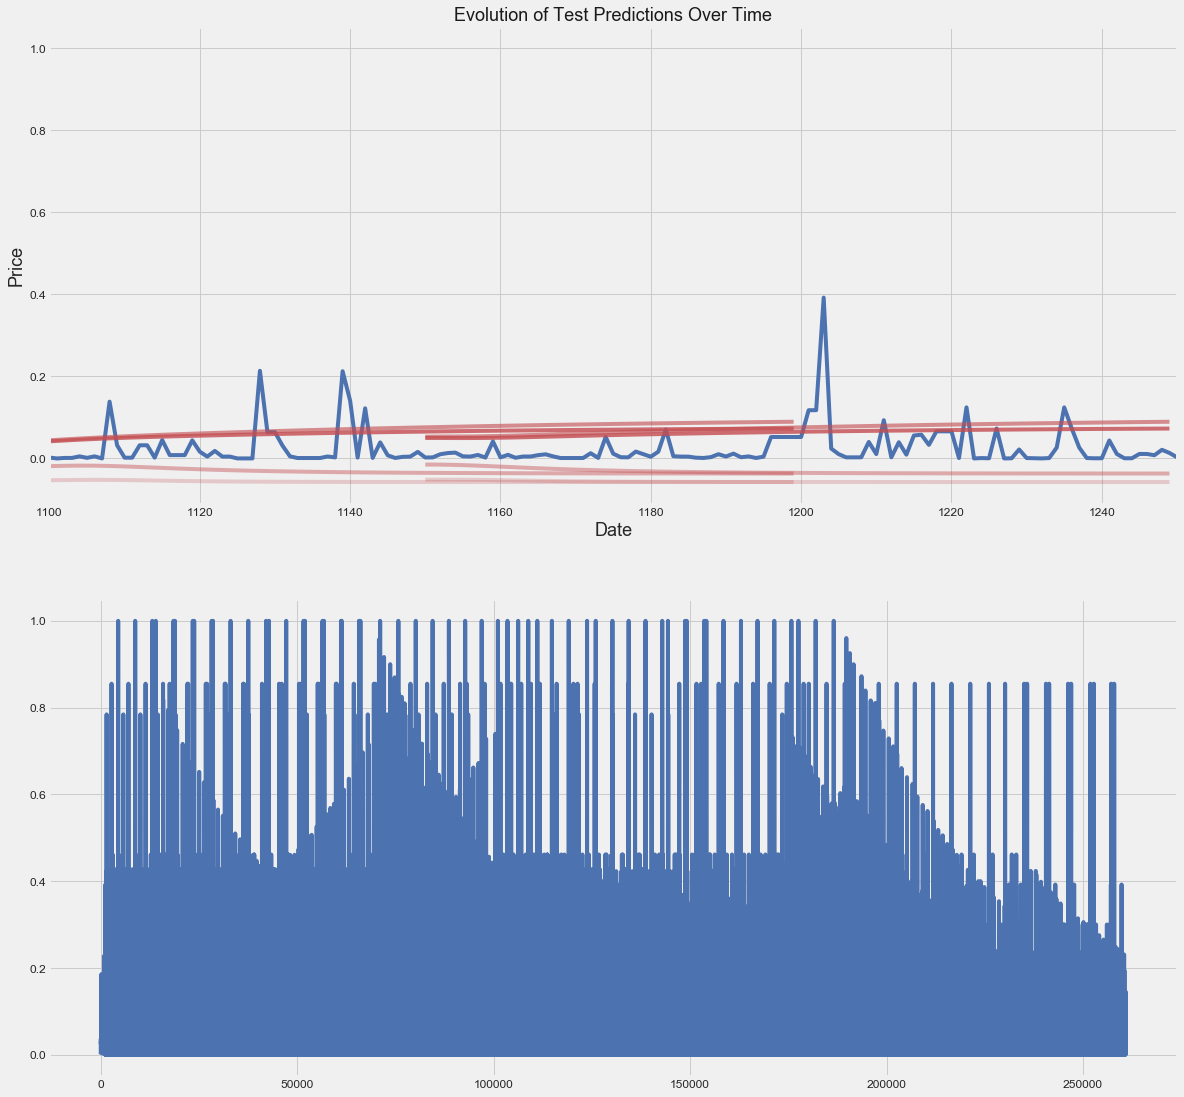

In [123]:
best_prediction_epoch = 28 # replace this with the epoch that you got the best results when running the plotting code

plt.figure(figsize = (18,18))
plt.subplot(2,1,1)
plt.plot(range(test_lin.shape[0]),all_mid_data,color='b')

# Plotting how the predictions change over time
# Plot older predictions with low alpha and newer predictions with high alpha
start_alpha = 0.25
alpha  = np.arange(start_alpha,1.1,(1.0-start_alpha)/len(predictions_over_time[::3]))
for p_i,p in enumerate(predictions_over_time[::3]):
    for xval,yval in zip(x_axis_seq,p):
        plt.plot(xval,yval,color='r',alpha=alpha[p_i])

plt.title('Evolution of Test Predictions Over Time',fontsize=18)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price',fontsize=18)
plt.xlim(1100,1250)

plt.subplot(2,1,2)

# Predicting the best test prediction you got
plt.plot(range(test_lin.shape[0]),all_mid_data,color='b')
for xval,yval in zip(x_axis_seq,predictions_over_time[best_prediction_epoch]):
    plt.plot(xval,yval,color='r')

plt.title('Best Test Predictions Over Time',fontsize=18)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price',fontsize=18)
plt.xlim(1000,1250)
plt.show()

https://blog.goodaudience.com/first-experience-of-building-a-lstm-model-with-tensorflow-e632bde911e1

In [ ]:
model_feat.sample(2)

In [ ]:
# from pandas import read_csv
from matplotlib import pyplot
# load dataset
dataset = model_feat.copy()#read_csv('pollution.csv', header=0, index_col=0)
values = dataset.values
# specify columns to plot
groups = [4,8]
i = 1
# plot each column
pyplot.figure()
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()

# ANOTHER METHODS APPROACHABLE

In [115]:
test_lin= test_lin.reset_index()

In [116]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [118]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
# load dataset
test_lin_1 = test_lin[['Timestamp', 'Memory', 'vCPUs', 'GPUs','InstanceType_code',
                       'AvailabilityZone_code','Price_Linux/UNIX']]
dataset = test_lin_1.set_index('Timestamp')
# dataset = read_csv('pollution.csv', header=0, index_col=0)
values = dataset.values
# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
# reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)   var1(t)  \
1   0.003971   0.007874        0.0   0.989583   0.642857   0.006716  0.003971   
2   0.003971   0.007874        0.0   0.989583   0.714286   0.006716  0.007685   
3   0.007685   0.023622        0.0   0.286458   0.642857   0.008971  0.003971   
4   0.003971   0.023622        0.0   0.484375   0.642857   0.002025  0.007685   
5   0.007685   0.023622        0.0   0.286458   0.714286   0.008971  0.003971   

    var2(t)  var3(t)   var4(t)   var5(t)   var6(t)  
1  0.007874      0.0  0.989583  0.714286  0.006716  
2  0.023622      0.0  0.286458  0.642857  0.008971  
3  0.023622      0.0  0.484375  0.642857  0.002025  
4  0.023622      0.0  0.286458  0.714286  0.008971  
5  0.023622      0.0  0.484375  0.714286  0.002025  


In [119]:
# split into train and test sets
values = reframed.values
n_train_hours = 365 * 480 #change this to change train and test dataset
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(175200, 1, 11) (175200,) (85660, 1, 11) (85660,)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 175200 samples, validate on 85660 samples
Epoch 1/10
 - 9s - loss: 0.0139 - val_loss: 0.0108
Epoch 2/10
 - 7s - loss: 0.0122 - val_loss: 0.0106
Epoch 3/10
 - 7s - loss: 0.0119 - val_loss: 0.0104
Epoch 4/10
 - 8s - loss: 0.0117 - val_loss: 0.0101
Epoch 5/10
 - 7s - loss: 0.0115 - val_loss: 0.0099
Epoch 6/10
 - 8s - loss: 0.0114 - val_loss: 0.0098
Epoch 7/10
 - 8s - loss: 0.0113 - val_loss: 0.0096
Epoch 8/10
 - 8s - loss: 0.0113 - val_loss: 0.0096
Epoch 9/10
 - 6s - loss: 0.0112 - val_loss: 0.0095
Epoch 10/10
 - 8s - loss: 0.0111 - val_loss: 0.0094


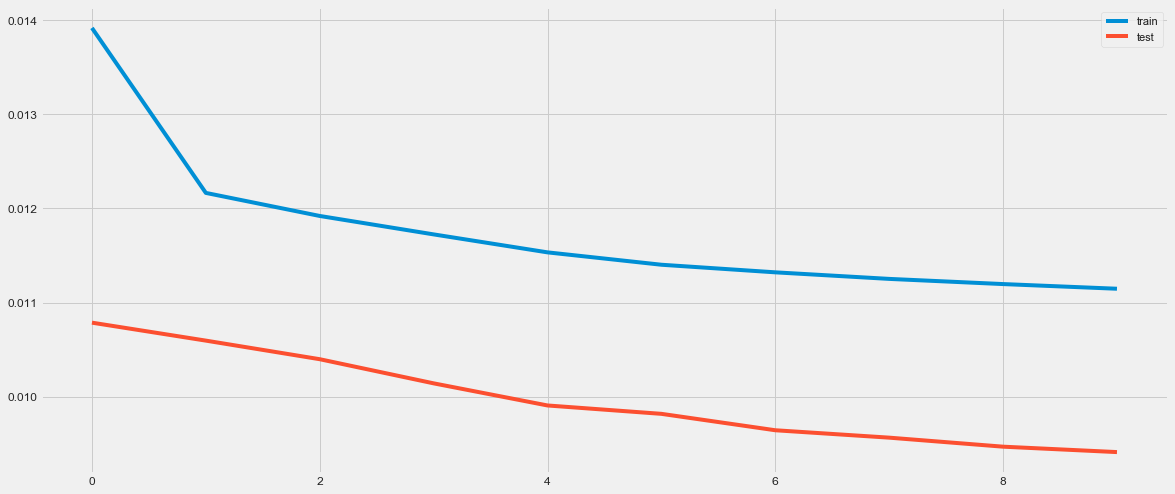

In [120]:
# design network
# from keras.utils.visualize_util import to_graph
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from keras.layers.recurrent import LSTM

model = Sequential()
model.add(LSTM(10, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=10, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

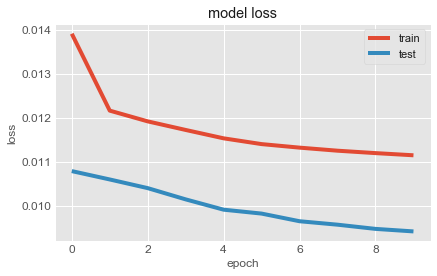

In [299]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [300]:
# # make a prediction
# yhat = model.predict(test_X)
# test_X = test_X.reshape((test_X.shape[0]))
# # invert scaling for forecast
# inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
# inv_yhat = scaler.inverse_transform(inv_yhat)
# inv_yhat = inv_yhat[:,0]
# # invert scaling for actual
# test_y = test_y.reshape((len(test_y), 1))
# inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
# inv_y = scaler.inverse_transform(inv_y)
# inv_y = inv_y[:,0]
# # calculate RMSE
# rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
# print('Test RMSE: %.3f' % rmse)


ValueError: Error when checking input: expected lstm_2_input to have 3 dimensions, but got array with shape (85660, 11)

In [135]:
scaler.inverse_transform(inv_yhat)

ValueError: operands could not be broadcast together with shapes (85660,11) (6,) (85660,11) 

# WEB SCRAPING MAYBE FOR LATER

In [ ]:
# import boto3
# client = boto3.client('ec2', region_name='us-west-2', aws_access_key_id='',aws_secret_access_key='')

# regions = [x["RegionName"] for x in client.describe_regions()["Regions"]]

# INSTANCE = ['p2.xlarge','c3.8xlarge','m4.2xlarge']
# print("Instance: %s" % INSTANCE)

# results = []

# for region in regions:
#     prices = client.describe_spot_price_history(
#         InstanceTypes=INSTANCE,
#         ProductDescriptions=['Linux/UNIX', 'Windows'],
#         StartTime=(datetime.datetime.now() - datetime.timedelta(days=90)).isoformat(),
#         MaxResults=123
#     )

#     for price in prices["SpotPriceHistory"]:
#         results.append((price["AvailabilityZone"], price["SpotPrice"],price['InstanceType'], price['ProductDescription'], price['Timestamp']))

        
# # 3 regions (us-east-1, us-west-2, eu-west-1)
# # 10 types of instances
# # 2 OS



In [ ]:
# test = pd.DataFrame(results)
# cols = ['AvailabilityZone','SpotPrice','InstanceType','ProductDescription','Timestamp']
# test.columns = cols

In [ ]:
# test.head()